## RNN Regression Test



In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as torchNN
import matplotlib.pyplot as plt
from IPython import display
from torch.utils.data import DataLoader

%matplotlib inline

In [3]:
# regionData = torch.linspace(-5, 5, 10000)
# trainData = DataLoader(dataset = regionData, batch_size = 64, shuffle = True)

In [4]:
class Network(torchNN.Module):
    def __init__(self) -> None:
        super(Network, self).__init__()

        self.rnn = torchNN.RNN(
            input_size = 1,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True
        )

        self.outLayer = torchNN.Linear(
            in_features = 32,
            out_features = 1
        )
    
    def forward(self, inputs, h):
        x, h = self.rnn(inputs, h)
        return self.outLayer(x), h


In [5]:
model = Network()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.03)
lossFunction = torchNN.MSELoss()
hiddenState = None

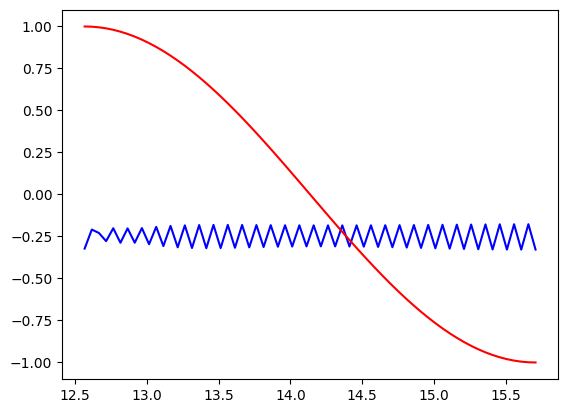

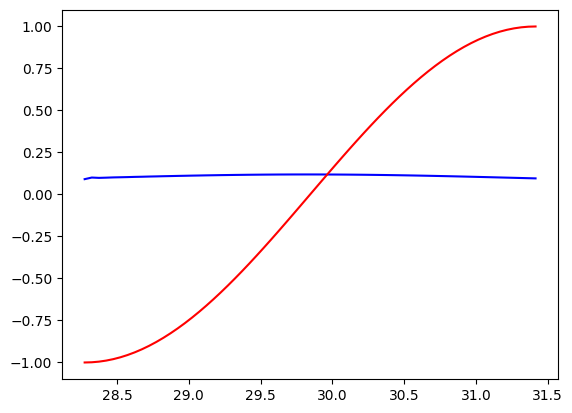

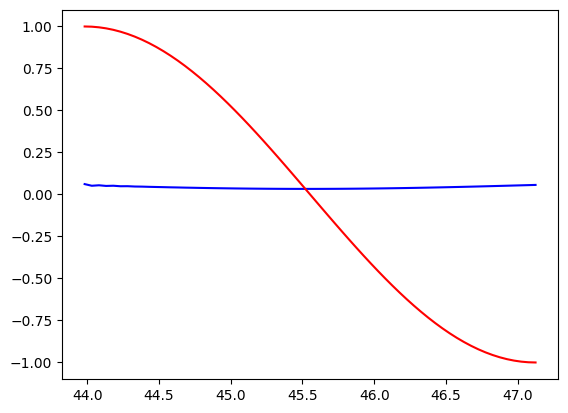

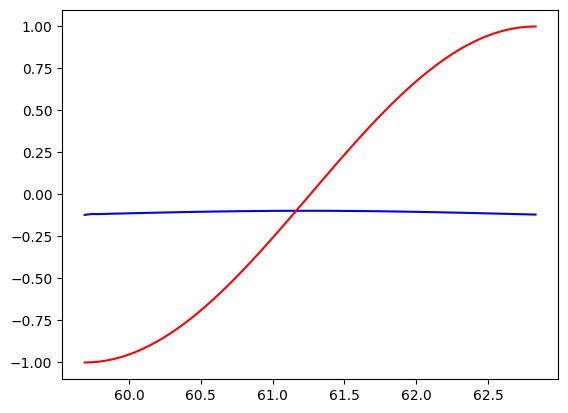

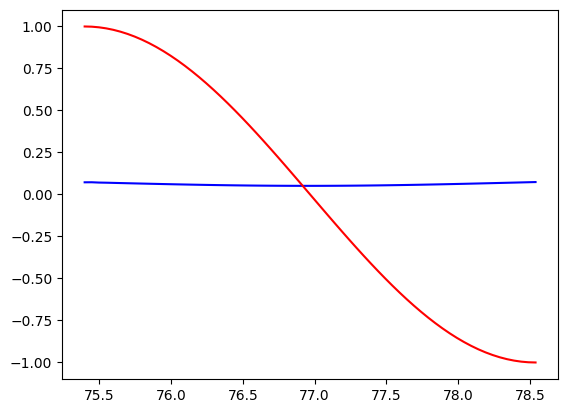

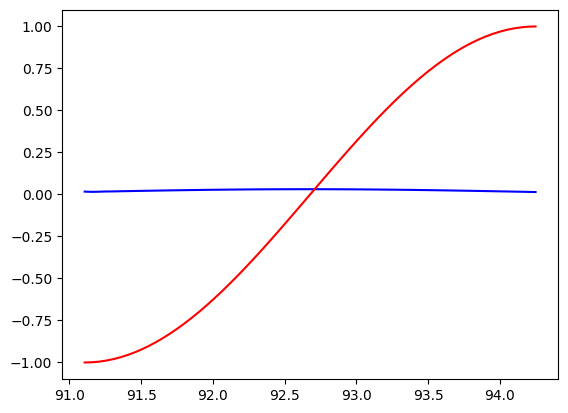

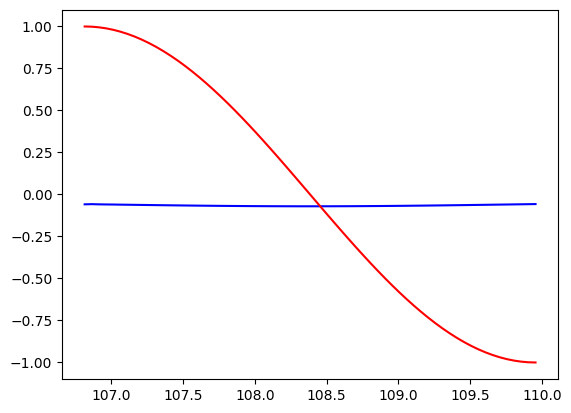

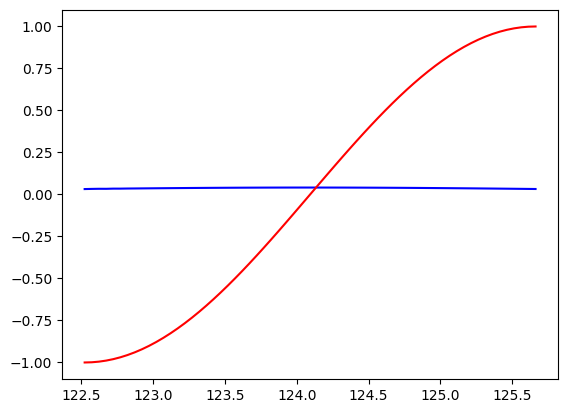

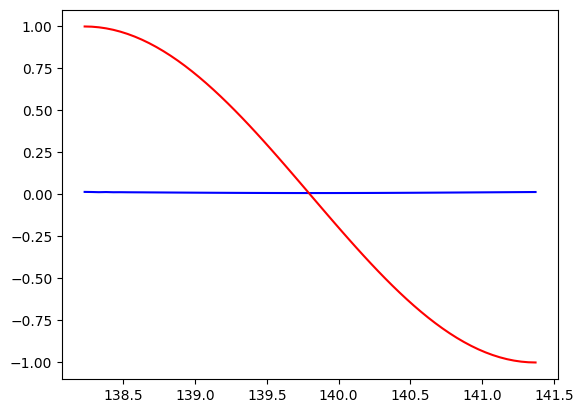

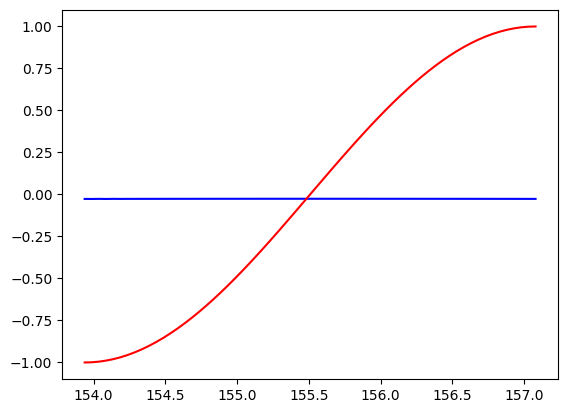

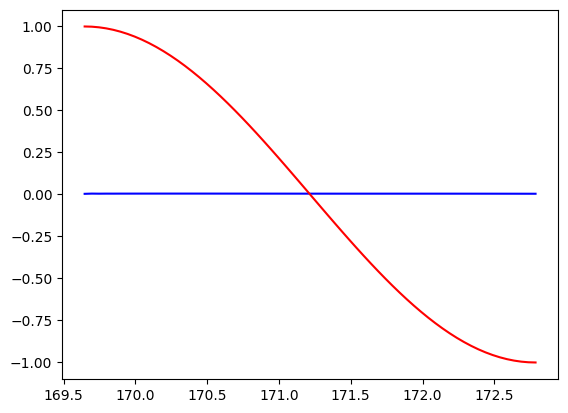

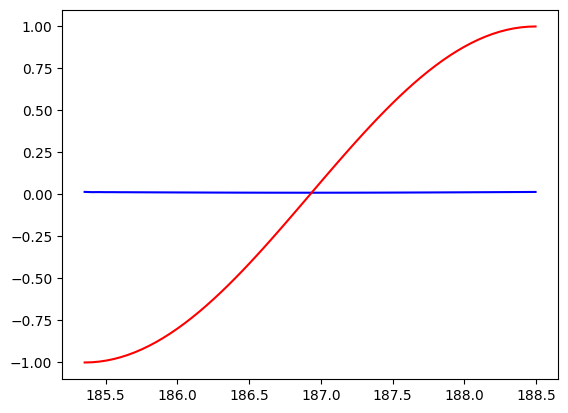

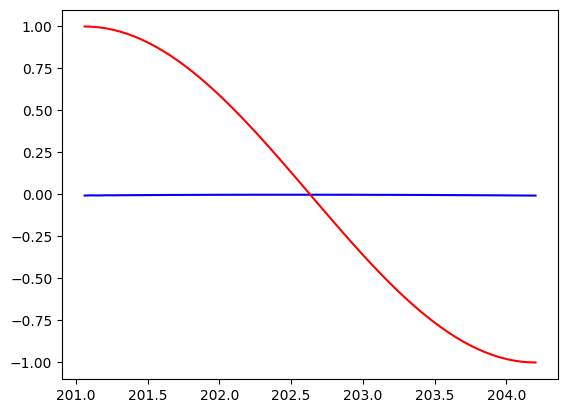

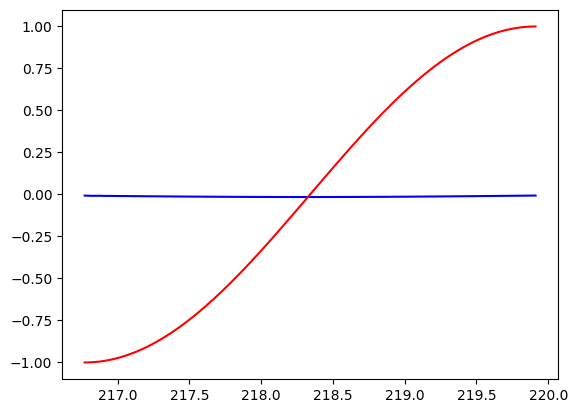

KeyboardInterrupt: 

In [7]:
fig = plt.figure()

for step in range(100):

    start, end = step * np.pi, (step + 1) * np.pi

    data = torch.linspace(start, end, 64)

    trainX = torch.sin(data)
    trainY = torch.cos(data)

    trainX = trainX.view(64, 1)
    trainY = trainY.view(64, 1)

    predictY, hiddenState = model(trainX, hiddenState)
    hiddenState = hiddenState.data

    loss = lossFunction(predictY, trainY)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (step + 1) % 5 == 0:
        plt.plot(data, predictY.view(-1).data.numpy(), color = 'blue')
        plt.plot(data, trainY.view(-1).data.numpy(), color = 'red')
        plt.pause(0.1)
        plt.show()
        display.clear_output(wait = True)